In [ ]:
pip install pgmpy

Naive Bayes Accuracy: 0.8049

Conditional Probability Distributions (CPDs):
CPD of Gender:
+-----------+-----------+
| Gender(0) | 0.18241   |
+-----------+-----------+
| Gender(1) | 0.796417  |
+-----------+-----------+
| Gender(2) | 0.0211726 |
+-----------+-----------+
CPD of Loan_Status:
+----------------+-----+---------------------+
| Credit_History | ... | Credit_History(1.0) |
+----------------+-----+---------------------+
| Education      | ... | Education(1)        |
+----------------+-----+---------------------+
| Gender         | ... | Gender(2)           |
+----------------+-----+---------------------+
| Married        | ... | Married(2)          |
+----------------+-----+---------------------+
| Property_Area  | ... | Property_Area(2)    |
+----------------+-----+---------------------+
| Self_Employed  | ... | Self_Employed(2)    |
+----------------+-----+---------------------+
| Loan_Status(0) | ... | 0.5                 |
+----------------+-----+---------------------+
| 

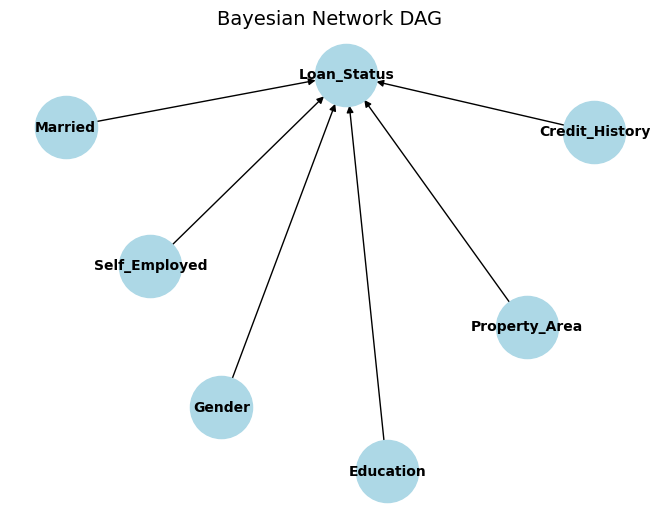

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx

file_path = "loan_sanction_train.csv"  
target_col = "Loan_Status"  # Replace 'target'

df = pd.read_csv(file_path)
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=[target_col])
y = df[target_col]

impute = SimpleImputer(strategy="mean")
X = impute.fit_transform(X)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=22)

bayes = GaussianNB()
bayes.fit(X_train, y_train)

y_pred = bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")



# Bayesian Network
features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
structure = [(feature, target_col) for feature in features]
naive_bayes = BayesianNetwork(structure)

naive_bayes.fit(df, estimator=MaximumLikelihoodEstimator)

# CPDs
print("\nConditional Probability Distributions (CPDs):")
for cpd in naive_bayes.get_cpds():
    print(f"CPD of {cpd.variable}:")
    print(cpd)

# Inference
infer = VariableElimination(naive_bayes)
query_result = infer.query(variables=['Loan_Status'], evidence={'Credit_History': 1.0, 'Education': 0})
print("\nQuery Result:")
print(query_result)

# Visualization
def plot_dag(model):
    pos = nx.spring_layout(model)
    nx.draw(model, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title("Bayesian Network DAG", fontsize=14)
    plt.show()

dag = nx.DiGraph(naive_bayes.edges())
plot_dag(dag)
